In [68]:
import jax
import jax.numpy as jnp
import jax.scipy as scipy
from jax import random
import matplotlib.pyplot as plt
import pylab as py
import statsmodels.api as sm

Normal to Uniform

In [69]:
key = random.PRNGKey(0)
mean = jnp.array([1,2])
rho = 0.5
cov = jnp.array([[1,rho*jnp.sqrt(2)], [rho*jnp.sqrt(2), 2]])
x = random.multivariate_normal(key, mean = mean, cov=cov, shape= (1000,))


In [70]:
y = jnp.zeros(shape = (1000,2))
y = y.at[:,0].set((x[:,0] - mean[0])/cov[0,0]) 
y = y.at[:,0].set(scipy.stats.norm.cdf(y[:,0]))

y = y.at[:,1].set((x[:,1] - mean[1] - (rho*cov[1,1]/cov[0,0])*(x[:,0] - mean[0]))/(cov[1,1] * jnp.sqrt(1 - rho**2)))
y = y.at[:,1].set(scipy.stats.norm.cdf(y[:,1]))

Text(0.5, 1.0, 'Uniform distribution')

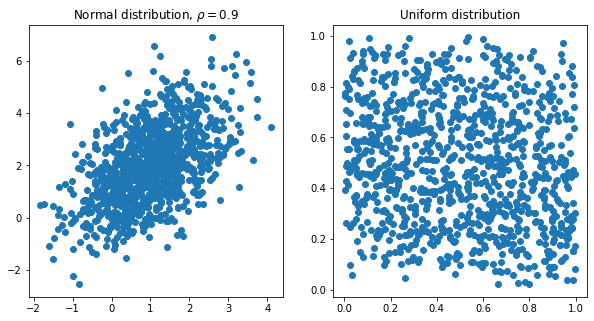

In [71]:
plt.rcParams["figure.figsize"] = (10,5)
plt.subplot(1,2,1)
plt.scatter(x[:,0], x[:,1])
plt.title(r'Normal distribution, $\rho = 0.9$')
plt.subplot(1,2,2)
plt.scatter(y[:,0], y[:,1])
plt.title("Uniform distribution")

Mixture of Gaussians to Standard normal

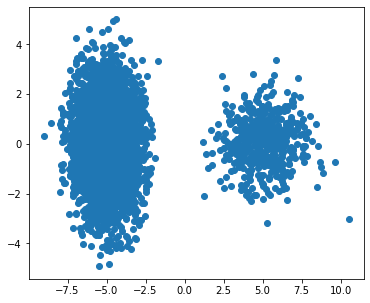

In [76]:
z = jnp.zeros(shape = (5000,2))
mean1, mean2 = jnp.array([-5, 0]), jnp.array([5, 0])
cov1, cov2 = jnp.array([[1,0], [0,2]]), jnp.array([[2,0], [0,1]])
p = 0.5
idx = random.bernoulli(key, p = p, shape = (1000,))
for i in range(5000):
    if(idx[i]):
        z = z.at[i,:].set(random.multivariate_normal(random.PRNGKey(i), mean = mean1, cov = cov1))
    else:
        z = z.at[i,:].set(random.multivariate_normal(random.PRNGKey(i), mean = mean2, cov = cov2))
plt.rcParams["figure.figsize"] = (6,5)
plt.scatter(z[:,0], z[:,1])


In [77]:
def gaussian_mix_cdf(x, mean1, mean2, var1, var2, p):
    return(p*(scipy.stats.norm.cdf((x - mean1)/jnp.sqrt(var1))) + (1-p)*scipy.stats.norm.cdf((x - mean2)/jnp.sqrt(var2)))

vec_gaussian_mix_cdf = jnp.vectorize(gaussian_mix_cdf)

Text(0, 0.5, 'Y')

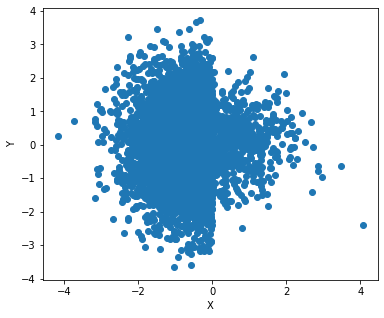

In [78]:
y = jnp.zeros(shape = (5000,2))
y = y.at[:,0].set(vec_gaussian_mix_cdf(z[:,0], mean1[0], mean2[0], cov1[0,0], cov2[0,0], p))
y = y.at[:,0].set(scipy.special.ndtri(y[:,0]))

y = y.at[:,1].set(vec_gaussian_mix_cdf(z[:,1], mean1[1], mean2[1], cov1[1,1], cov2[1,1], p))
y = y.at[:,1].set(scipy.special.ndtri(y[:,1]))
plt.rcParams["figure.figsize"] = (6,5)
plt.scatter(y[:,0], y[:,1])
plt.xlabel("X")
plt.ylabel("Y")

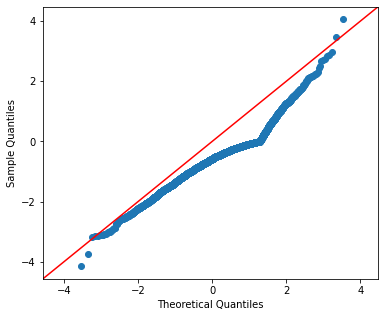

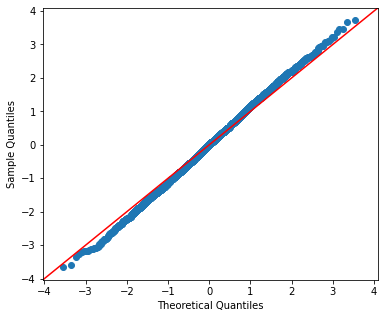

In [79]:
sm.qqplot(y[:,0], line ='45')
py.show()
sm.qqplot(y[:,1], line ='45')
py.show()

Text(0, 0.5, 'Y')

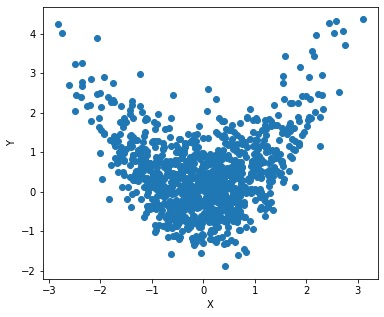

In [38]:
z = random.multivariate_normal(key, mean = jnp.array([0,0]), cov = jnp.array([[1,0], [0,1]]), shape = (1000,))
z = z.at[:,1].set(jnp.sqrt(0.5)*z[:,1] + (z[:,0]**2)/2)
plt.scatter(z[:,0], z[:,1])
plt.xlabel("X")
plt.ylabel("Y")

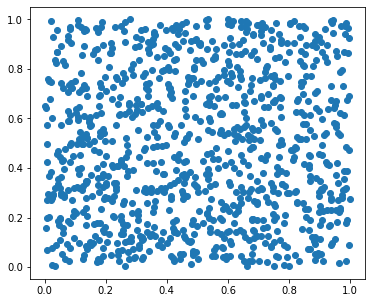

In [39]:
y = jnp.zeros(shape = (1000,2))
y = y.at[:,0].set(scipy.stats.norm.cdf(z[:,0]))
y = y.at[:,1].set(scipy.stats.norm.cdf((z[:,1] - (z[:,0]**2)/2)/jnp.sqrt(0.5)))
plt.scatter(y[:,0], y[:,1])

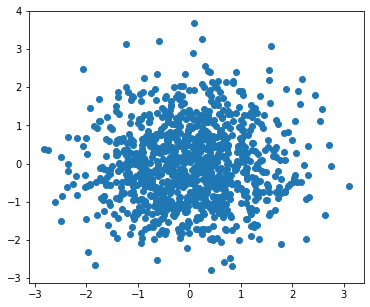

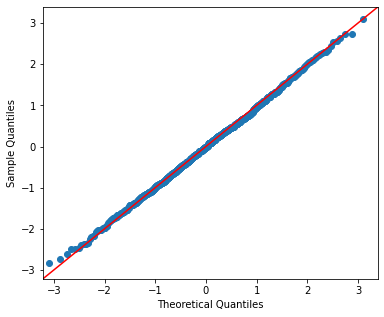

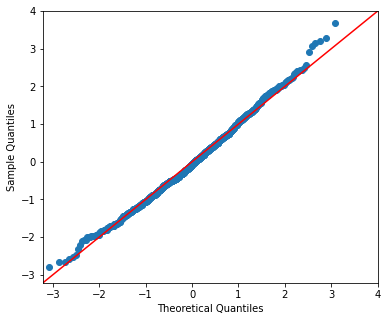

In [40]:
y = y.at[:,0].set(scipy.special.ndtri(y[:,0]))
y = y.at[:,1].set(scipy.special.ndtri(y[:,1]))

plt.scatter(y[:,0], y[:,1])
sm.qqplot(y[:,0], line ='45')
py.show()
sm.qqplot(y[:,1], line ='45')
py.show()